<a href="https://colab.research.google.com/github/csgellert/tobbvalt-projekt/blob/Open-in-colab/Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Convay's Game of Life**
##Python implementáció:

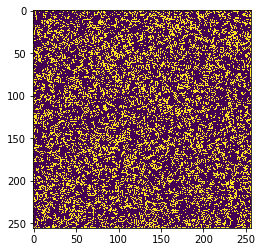

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation#, rc
import random

def update(frameNum,img,array):
	whole_sum = np.sum(array)
	isFirstIter = True
	if whole_sum==0: # ha üres, akkor nem kell csinálni vele semmit
		img.set_data(array)
		return img
	Big_array = np.zeros((array.shape[0]+2,array.shape[1]+2)) # zeropadding
	Big_array[1:-1,1:-1] = array
	for i in range(0,array.shape[0]):
		for j in range(0,array.shape[1]):
			db = np.sum(Big_array[i:i+3,j:j+3]) # kernelben az élő elemszám
			if db==0:
				continue
			c = Big_array[i+1,j+1] # a kernel középpontja
			db -= c
			if (db==3 or (db==2 and c==1)):
			    array[i,j]=1
			else:
				array[i,j]=0
			whole_sum-=c
		#gyorsítás érdekében megnézzük, hogy az összes életben lévő pontot megvizsgáltuk-e, és hagyunk neki még egy kört, hogy a következő sorban esetlegesen születő pontokat el tudja helyezni
		if whole_sum==0 and isFirstIter:
			isFirstIter = False
		elif whole_sum==0 and isFirstIter==False:
			img.set_data(array)
			return img

	img.set_data(array)
	return img


# random inicializálás
N = 256   # tábla méret
Board = np.zeros((N,N))
for i in range(0,Board.shape[0]):
	for j in range(0,Board.shape[1]):
		Board[i,j] = random.randint(0,1)
  
# Megjelenítés 
fig, ax = plt.subplots() 
img = ax.imshow(Board, interpolation='nearest') 
anim = animation.FuncAnimation(fig, update, frames = 100,fargs=(img,Board,), interval = 50)
#rc('animation', html='jshtml')
#anim
plt.show()

##**Alakzatok:**
* **Stabil alakzat:**

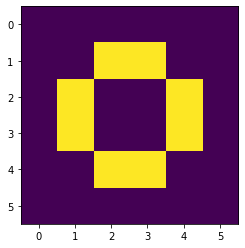

In [0]:
alak = np.zeros((4,4))

alak[0,1] = alak[0,2] = 1
alak[1,0] = alak[1,3] = 1
alak[2,0] = alak[2,3] = 1
alak[3,1] = alak[3,2] = 1

zeropad = np.zeros((6,6))
zeropad[1:-1,1:-1]=alak
plt.imshow(zeropad)
plt.show()

* **Forgó alakzat:**

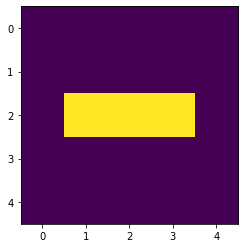

In [0]:
alak = np.ones((1,3))

zeropad = np.zeros((5,5))
zeropad[2,1:-1] = alak
plt.imshow(zeropad)
plt.show()

* **Mászó alakzat:**

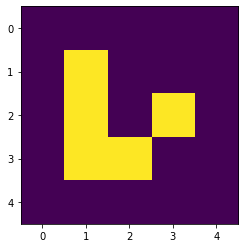

In [0]:
alak = np.array([[1,0,0],[1,0,1],[1,1,0]])

zeropad = np.zeros((5,5))
zeropad[1:-1,1:-1] = alak
plt.imshow(zeropad)
plt.show()